# IMAC2 : TP de filtrage no 2 

In [1]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io

def enregistrer_son(nom_fichier,s,Fs):
    y=0.5*normaliser_son_mono(s)  ### le facteur 0.5 pour éviter d'exploser les oreilles...
    scaled = np.round(32767*y)   ### passage en 16 bits
    newdata = scaled.astype(np.int16)   ### conversion en type int
    io.write(nom_fichier, Fs, newdata)   ### codage en wav

    
### A effectuer avant d'enregistrer : 
def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;      


class periodogramme:
    pass
## on conviendra que les champs d'un periodogramme (appelons-le S) sont : 
##  S.val  : les valeurs du spectre 
##  S.nu : le vecteur des fréquences normalisées 
##  S.Fe : la frequence d'echantillonnage en Hz
## EXEMPLE D'APPLICATION :  plt.plot((S.nu)*XS.Fs,S.val)

def creer_periodogramme(valeurs,nu,Fs):
    S=periodogramme()
    S.val=valeurs
    S.nu = nu
    S.Fe = Fs
    return(S)


def calcul_periodogramme(x,Fe):
    ### périodogramme moyenné. Sections de 0.1 seconde
    N=len(x)
    N1=int(np.floor(0.1*Fe))
    K=int(np.floor(N/N1))
    w=signal.hamming(N1)
    ind1 = 0
    ind2 = N1-1
    b = w*x[ind1:(ind2+1)] 
    f, B = signal.periodogram(b, Fe)
    B=B/N1
    while ind2+N1<N:
        ind1=ind1+N1
        ind2=ind2+N1
        b=w*x[ind1:(ind2+1)]
        f, aux = signal.periodogram(b, Fe)
        B=B+aux/N1
    B=B/K
    B=10*np.log10(B)
    return(f,B)
########### fin de la fonction 




In [2]:
## calcul de la RI du filtre PB ideal entre -N/2 et N/2
## Attention! N doit être pair
def PBideal(N,nu_c): 
    h=np.zeros(N+1)
    M=int(N/2)
    indices=np.arange(-M,M+1)
    aux = indices != 0.0
    ind2 = indices[aux]
    h[aux] = np.sin(2*np.pi*nu_c*ind2)/(np.pi * ind2)
    h[~aux]=2*nu_c
    return(h)

def PBfenetre(N,nu_c,type): 
    h1 = PBideal(N,nu_c); 
    M=int(N/2)
    if type == "rectangle": 
        return(h1)
    if type == "triangle":
        indices=np.arange(-M,M+1)
        w_triangle  = 1+ 2*(1-N)/(N*N)*np.abs(indices)
        return(h1*w_triangle)
    if type == "hamming": 
        w_hamming = signal.hamming(N+1)
        return(h1*w_hamming)
     


<Figure size 432x288 with 0 Axes>

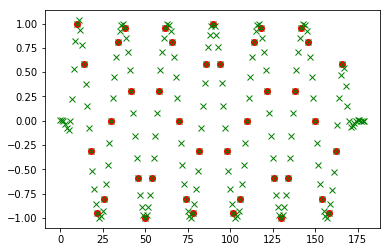

In [3]:
### Application re-echantillonnage
K=40
indices = np.arange(0,K)
x = np.cos(2*np.pi*0.15*indices)

ind2=np.arange(0,4*K,4)
aux = np.array([1 , 0 , 0 , 0 ])
x2 = np.kron(x,aux)
plt.clf()
nu_c=0.5/4
N=20
h3=PBfenetre(N,nu_c,"hamming")
x3 = 4*signal.convolve(x2,h3)
plt.figure(4)
plt.clf()
plt.plot(ind2+N/2,x,'or')
plt.plot(x3,'xg')
plt.show()

In [28]:
Fe, data = io.read("SiTuDoisMourir.wav")
x = data[:,0] + data[:,1]
q = 4
a = np.array([1, 0, 0, 0])
x_tilde = np.kron(x, a)

# Un échantillon sur 3 de x_tilde
y = x_tilde[1::3]
enregistrer_son("SiTuDoisMourir_lent.wav", y, Fe)

N = int(4 / nu_c)
nu_c = 1 / (2 * q)
h = PBfenetre(N, nu_c, "hamming")
x4 = signal.convolve(h, x_tilde)
y = x4[1::3]
enregistrer_son("SiTuDoisMourir_lent-hamming.wav", y, Fe)